r"""
Bootstrap Calculations of Error on Mean
---------------------------------------
Figure 4.3.

The bootstrap uncertainty estimates for the sample standard deviation
:math:`\sigma` (dashed line; see eq. 3.32) and :math:`\sigma_G` (solid line;
see eq. 3.36). The sample consists of N = 1000 values drawn from a Gaussian
distribution with :math:`\mu = 0` and :math:`\sigma = 1`. The bootstrap
estimates are based on 10,000 samples. The thin lines show Gaussians with
the widths determined as :math:`s / \sqrt{2(N - 1)}` (eq. 3.35) for
:math:`\sigma` and :math:`1.06 s / \sqrt{N}` (eq. 3.37) for :math:`\sigma_G`.
"""

In [2]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

from astroML.resample import bootstrap
from astroML.stats import sigmaG

In [3]:
#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)

In [4]:
import matplotlib.colors as colors
import matplotlib.cm as cmx
import matplotlib.dates as mdates
from matplotlib import gridspec

In [5]:
N=10
jet = plt.get_cmap('jet')
cNorm = colors.Normalize(vmin=0, vmax=N)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=jet)
all_colors = scalarMap.to_rgba(np.arange(N), alpha=1)

In [6]:
# to enlarge the sizes
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

In [7]:
m = 1000  # number of points
n = 10000  # number of bootstraps

# sample values from a normal distribution

In [10]:
#------------------------------------------------------------
# sample values from a normal distribution
np.random.seed(123)
data = norm(0, 1).rvs(m)

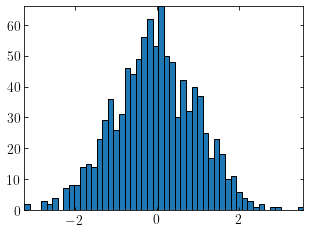

In [14]:
fig, ax = plt.subplots(figsize=(5, 3.75))
ax.hist(data,bins=50);

# Compute bootstrap resamplings of data

In [15]:
#------------------------------------------------------------
# Compute bootstrap resamplings of data
mu1_bootstrap = bootstrap(data, n,  np.std, kwargs=dict(axis=1, ddof=1))
mu2_bootstrap = bootstrap(data, n, sigmaG, kwargs=dict(axis=1))

Text(0.5, 1.0, 'mu2\\_bootstrap Distribution')

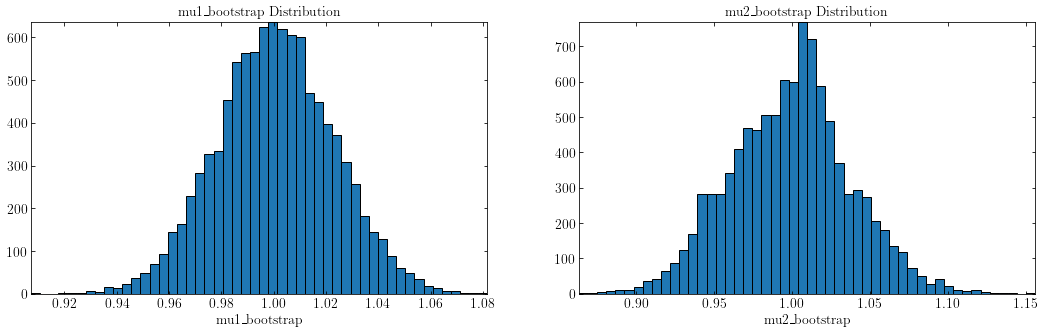

In [19]:
fig = plt.figure(figsize=(18, 5))
ax = fig.add_subplot(121)
ax.hist(mu1_bootstrap,bins=50);
ax.set_xlabel("mu1\_bootstrap")
ax.set_title(" mu1\_bootstrap Distribution")
ax = fig.add_subplot(122)
ax.hist(mu2_bootstrap,bins=50);
ax.set_xlabel("mu2\_bootstrap")
ax.set_title("mu2\_bootstrap Distribution")

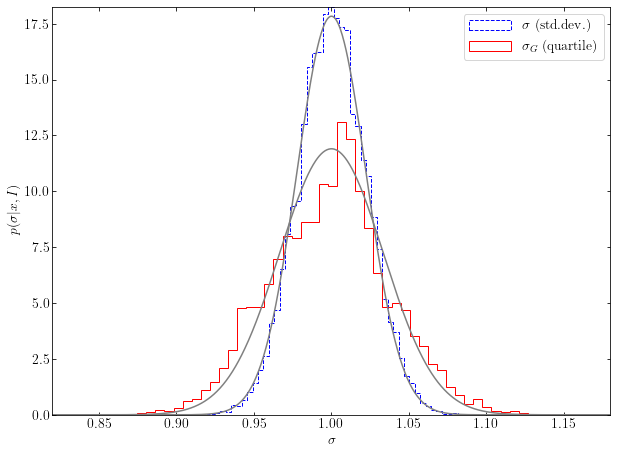

In [21]:
#------------------------------------------------------------
# Compute the theoretical expectations for the two distributions
x = np.linspace(0.8, 1.2, 1000)

sigma1 = 1. / np.sqrt(2 * (m - 1))
pdf1 = norm(1, sigma1).pdf(x)

sigma2 = 1.06 / np.sqrt(m)
pdf2 = norm(1, sigma2).pdf(x)

#------------------------------------------------------------
# Plot the results
fig, ax = plt.subplots(figsize=(10, 7.5))

ax.hist(mu1_bootstrap, bins=50, density=True, histtype='step',
        color='blue', ls='dashed', label=r'$\sigma\ {\rm (std. dev.)}$')
ax.plot(x, pdf1, color='gray')

ax.hist(mu2_bootstrap, bins=50, density=True, histtype='step',
        color='red', label=r'$\sigma_G\ {\rm (quartile)}$')
ax.plot(x, pdf2, color='gray')

ax.set_xlim(0.82, 1.18)

ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$p(\sigma|x,I)$')

ax.legend()

plt.show()